In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from collections import defaultdict
from shapely.geometry import Point, Polygon

# Init NuScenes. Requires the dataset to be stored on disk.
from nuscenes.nuscenes import NuScenes
from nuscenes.map_expansion.map_api import NuScenesMap

In [2]:
# LOADING the necessary files
with open('details/scene_info.pkl', 'rb') as handle:
    scene_info = pickle.load(handle)
    
with open('details/pedestrian_details.pkl', 'rb') as handle:
    pedestrian_details = pickle.load(handle)
    
with open('details/new_ped_details.pkl', 'rb') as handle:
    new_ped_details = pickle.load(handle)

In [3]:
trajectories = []

for p, val in new_ped_details.items():
    if len(val["translation"]) < 24:
        trajectories.append(val["translation"][:16])        
    elif len(val["translation"]) < 32:
        trajectories.append(val["translation"][:16])
        trajectories.append(val["translation"][-16:])
    elif len(val["translation"]) <= 40:
        trajectories.append(val["translation"][:16])
        trajectories.append(val["translation"][8:24])
        trajectories.append(val["translation"][16:32])
        trajectories.append(val["translation"][-16:])

In [4]:
trajectories_2d = np.array(trajectories)[:,:,:2]

In [7]:
def move_to_origin(l):
    x0, y0 = l[0]
    return [(x - x0, y - y0) for x, y in l]

def normalize(l):
    raise NotImplementedError

def rotate_to_y_axis(l):
    xn, yn = l[1]
    theta = np.arctan2(-yn, xn) + (np.pi / 2.0)
    return [(x*np.cos(theta) - y*np.sin(theta), x*np.sin(theta) + y*np.cos(theta)) for x, y in l]

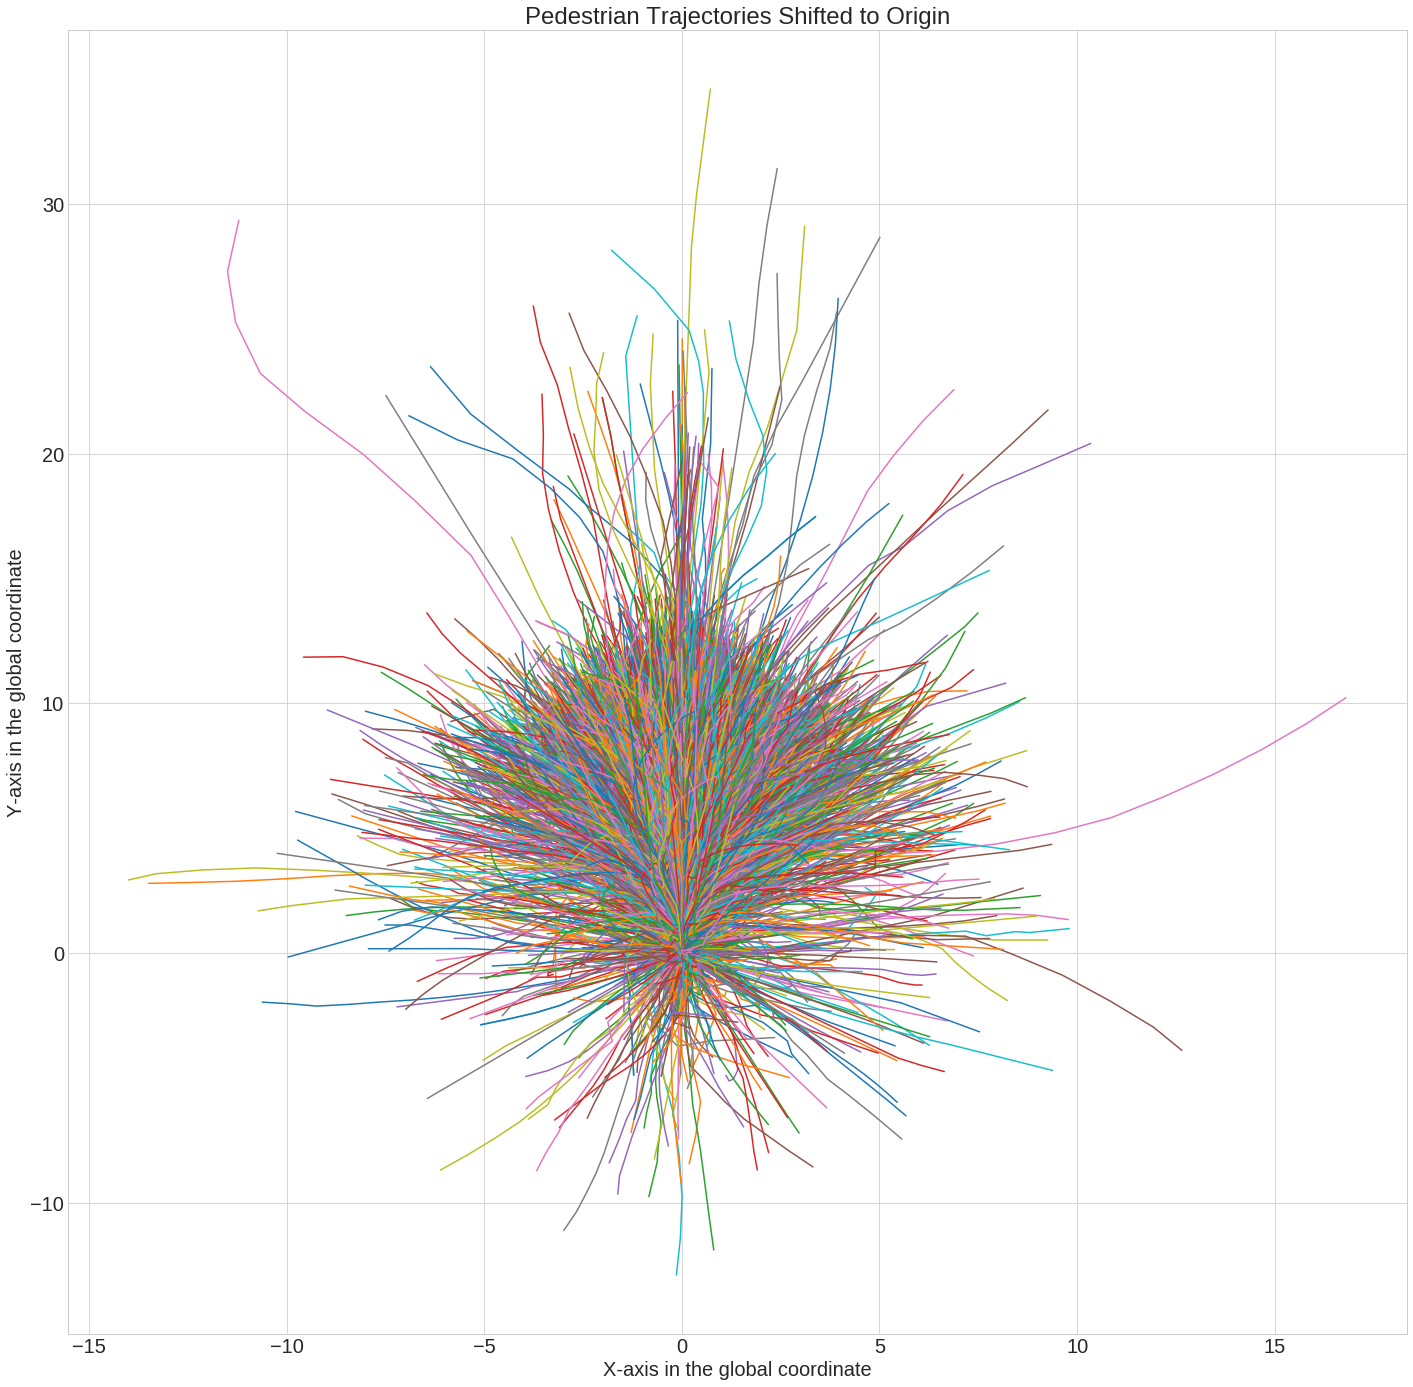

In [8]:
plt.figure(figsize=(24,24))
plt.rcParams.update({'font.size': 20})

for t in trajectories_2d:
    assert len(t) == 16
    plt.plot(*zip(*rotate_to_y_axis(move_to_origin(t))))

plt.xlabel("X-axis in the global coordinate")
plt.ylabel("Y-axis in the global coordinate")
plt.title("Pedestrian Trajectories Shifted to Origin")
plt.savefig("images/origin_trajectories_second.png", bbox_inches='tight', pad_inches=1)    
plt.show()

In [17]:
first_person = list(new_ped_details.keys())[0]
print("translation_z")
print(np.array(new_ped_details[first_person]["translation"])[:,2])
print()
print("velocity_z")
print(np.array(new_ped_details[first_person]["velocity"])[:,2])
print()
print("acceleration_x")
print(new_ped_details[first_person]["acceleration_x"])
print()
print("acceleration_y")
print(new_ped_details[first_person]["acceleration_y"])

translation_z
[1.26  1.33  1.305 1.28  1.255 1.28  1.28  1.28  1.38  1.33  1.33  1.33
 1.33  1.33  1.33  1.33  1.355 1.38  1.33  1.33  1.364 1.397 1.43 ]

velocity_z
[ 0.07001119  0.04089433 -0.05554094 -0.05561074  0.          0.02501971
  0.          0.10002552  0.05001285 -0.05266301  0.          0.
  0.          0.          0.          0.02499258  0.05001251 -0.02499203
 -0.04995599  0.03398987  0.06705504  0.06605318  0.06601599]

acceleration_x
[-0.22577722883796914, -0.25729193285390717, -0.22584714038149165, 0.22525418387651513, -0.18418085949952176, -0.2565497907111809, 0.4326045414119652, 0.08804548984036253, -0.01281631067184598, 0.070386825827638, 0.06554922117322899, 0.002124742602600202, 0.0082555469546503, -0.23723214572826617, -0.08010714938489091, -0.0342576767443486, -0.5316956573824408, -0.22902861819164053, -0.11059067039336223, -0.6682370744141152, -0.23046890114659382, 0.32742158201227856, 0.32742158201227856]

acceleration_y
[0.29533960597545034, 0.55597828857125

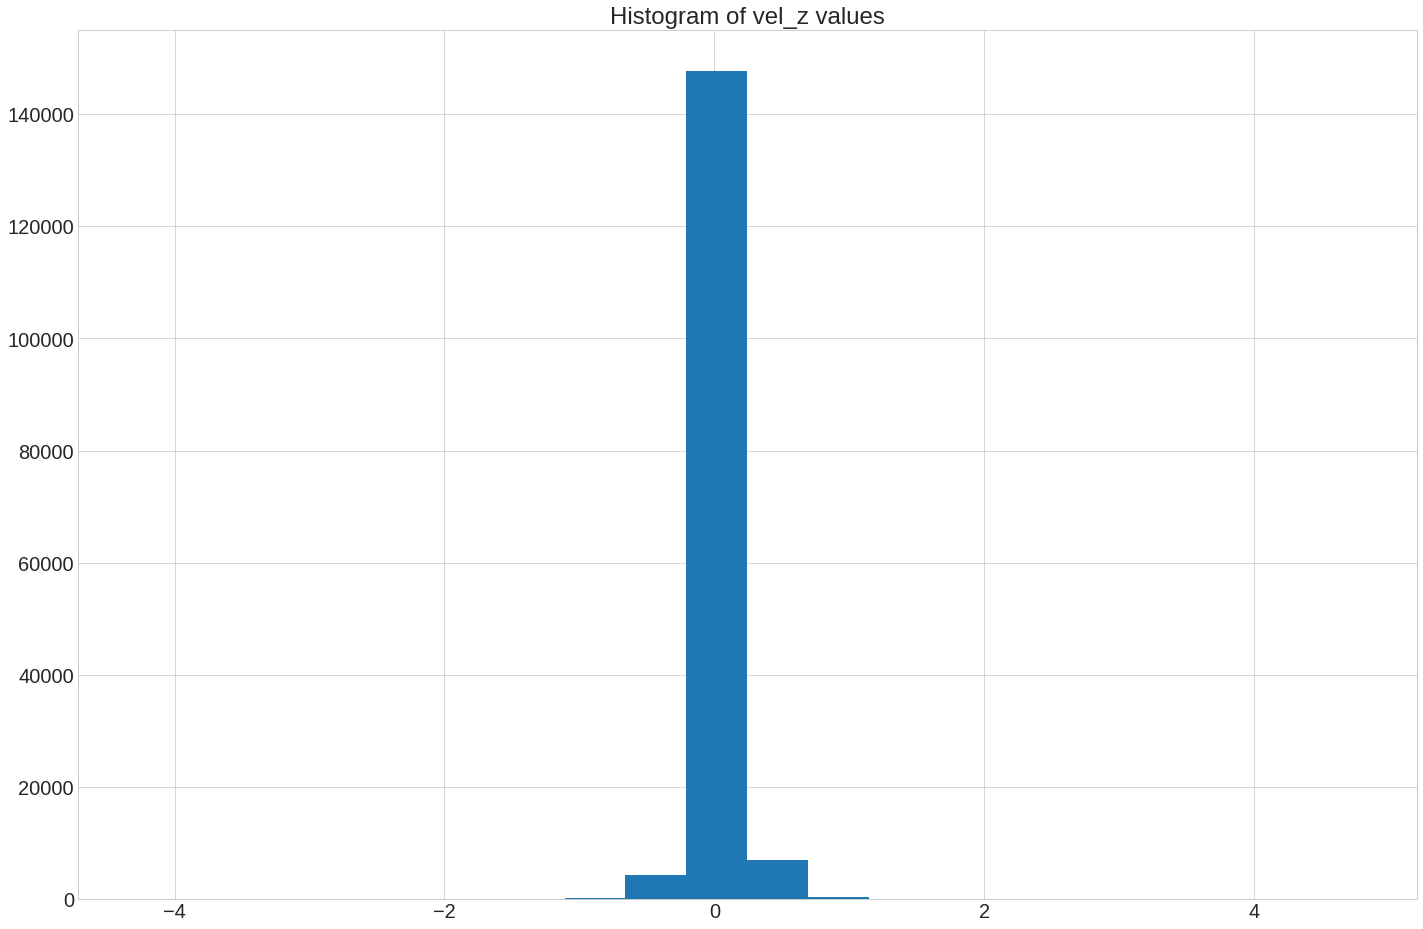

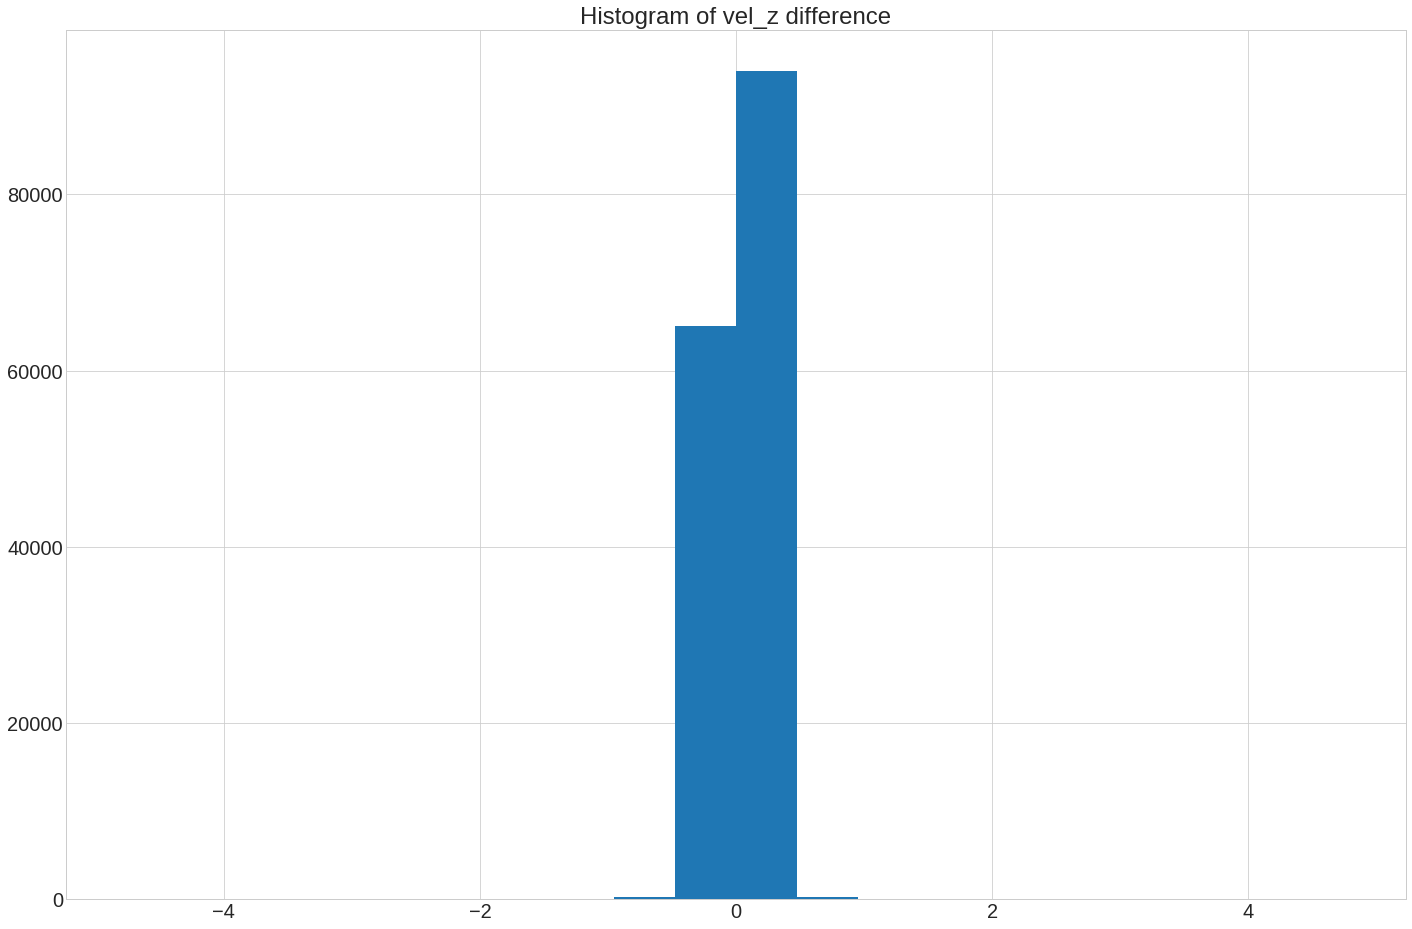

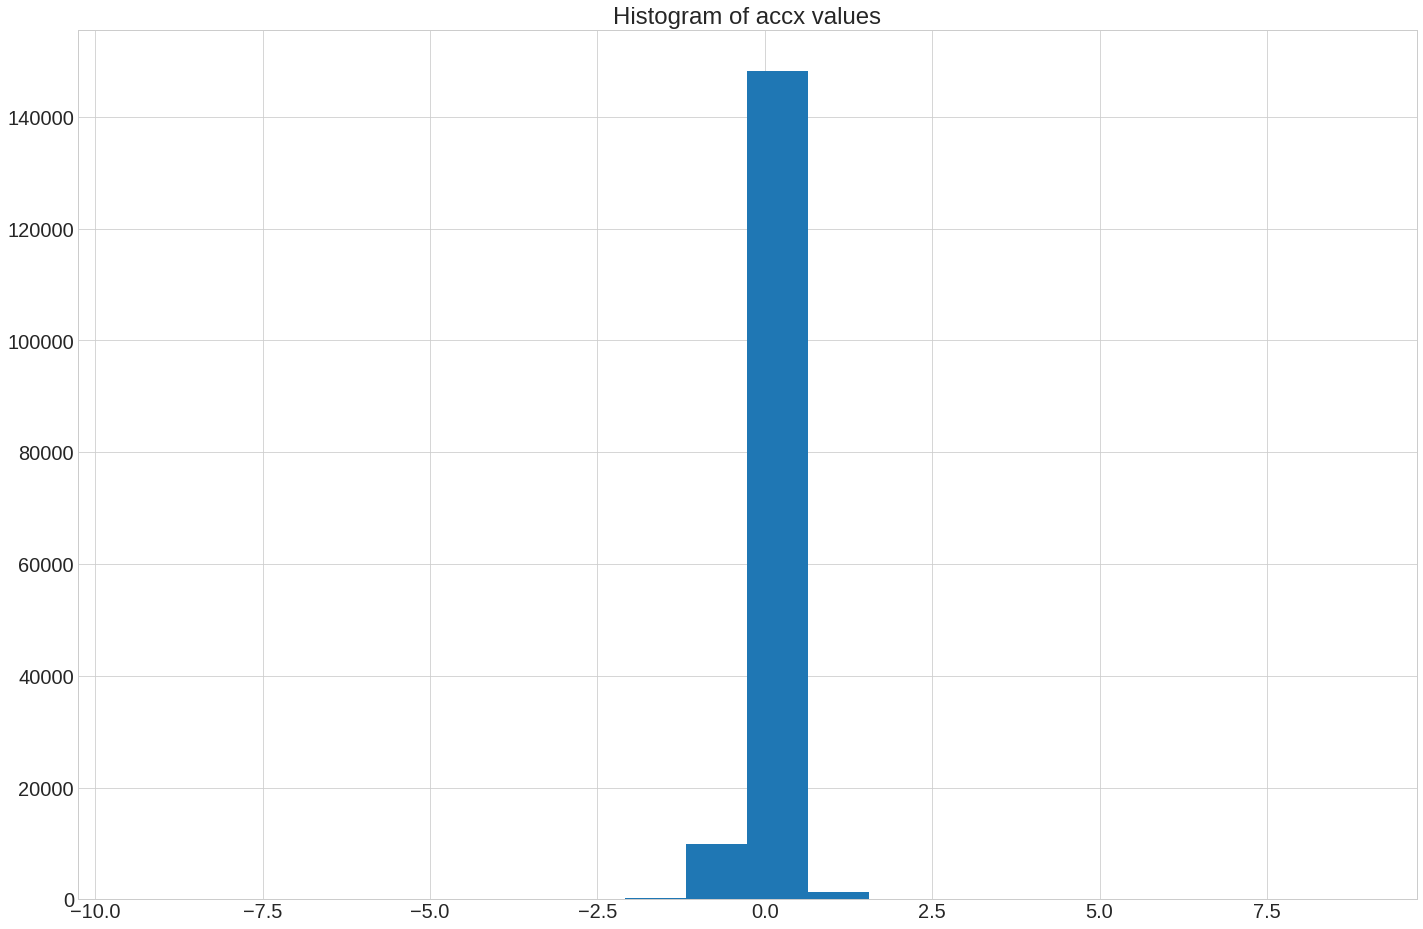

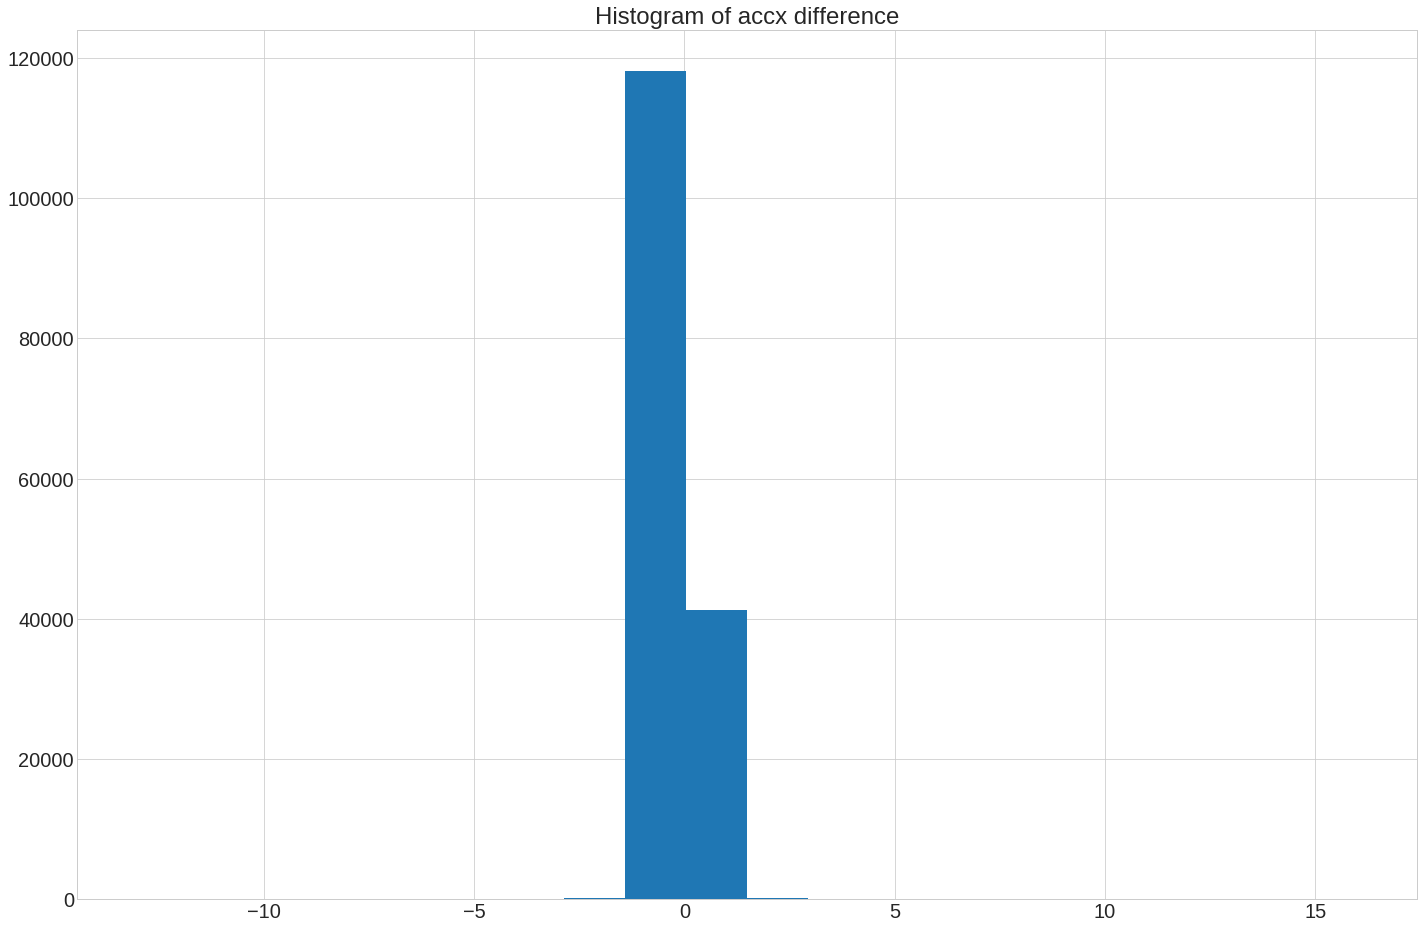

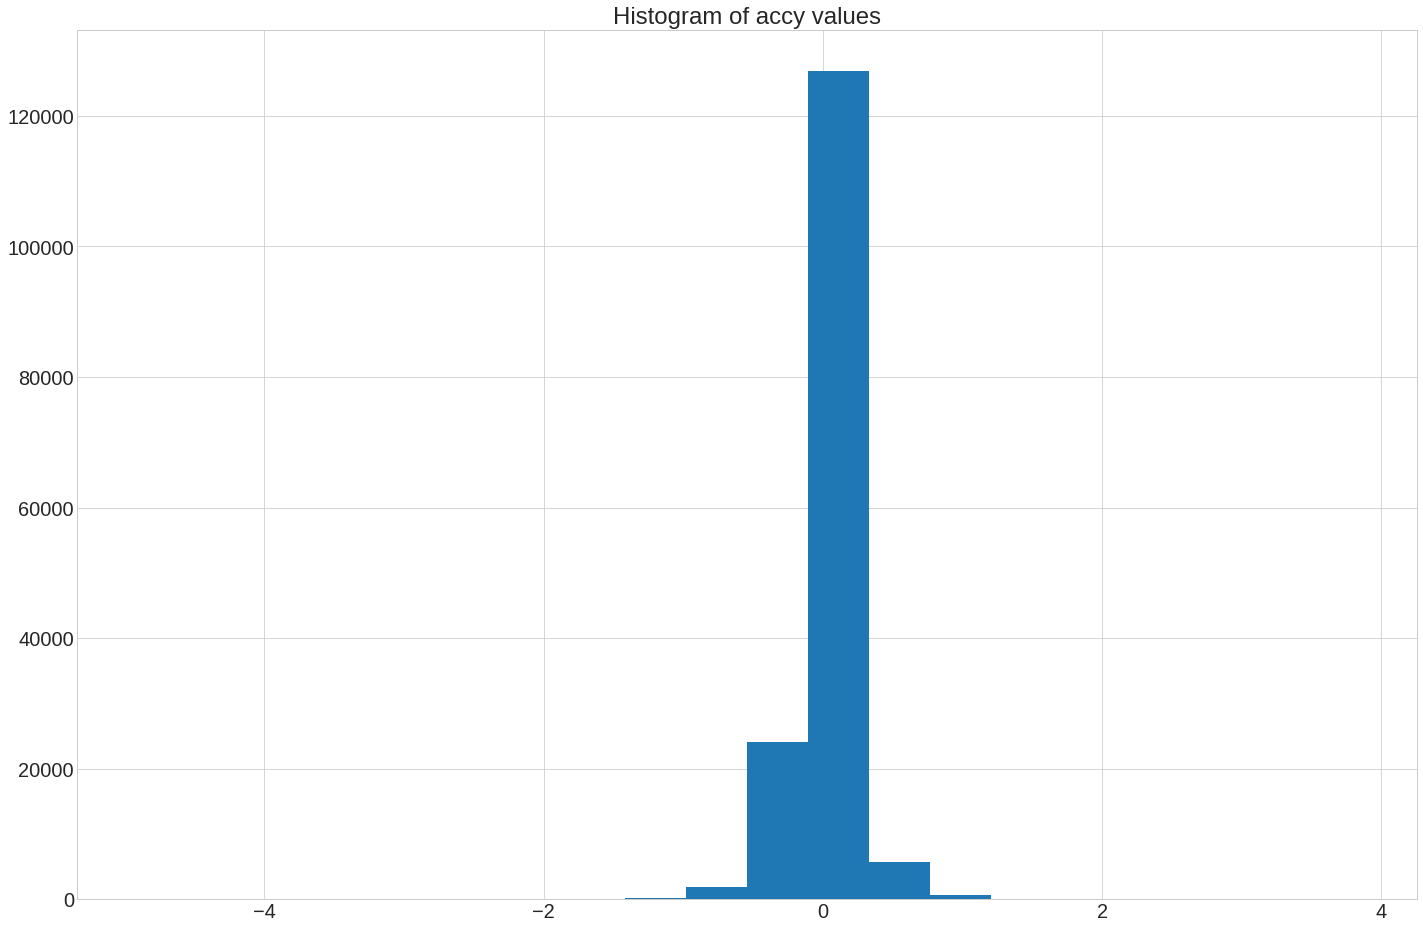

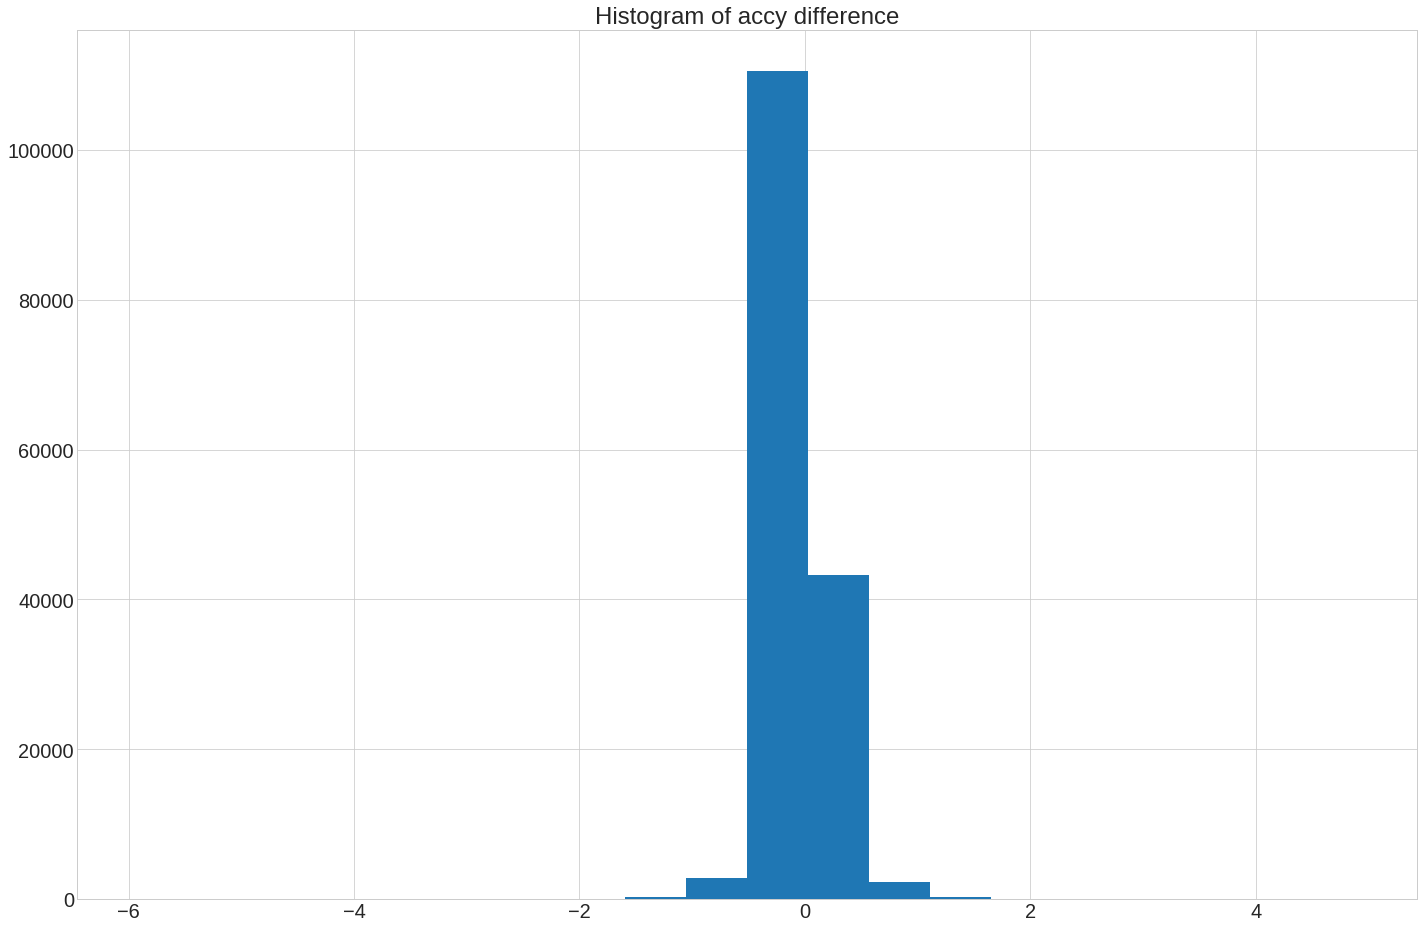

In [24]:
# plotting histogram of velocity_z diff
velz = []
velz_diffs = []

posz = []
posz_diffs = []

accx = []
accx_diffs = []

accy = []
accy_diffs = []


for l,z in new_ped_details.items():
    for i in np.array(z["velocity"])[:,2]:
        velz.append(i)
    for t in np.array(z["translation"])[:,2]:
        posz.append(t)
    for ax in np.array(z["acceleration_x"]):
        accx.append(ax)
    for ay in np.array(z["acceleration_y"]):
        accy.append(ay)
    
plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 20})

plt.hist(velz, bins=20)
plt.title("Histogram of vel_z values")
plt.savefig("images/velz.png", bbox_inches='tight', pad_inches=1)    
plt.show()

plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 20})

velz_diffs = np.diff(velz)
plt.hist(velz_diffs, bins=20)
plt.title("Histogram of vel_z difference")
plt.savefig("images/velz_diff.png", bbox_inches='tight', pad_inches=1)    
plt.show()

plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 20})

plt.hist(accx, bins=20)
plt.title("Histogram of accx values")
plt.savefig("images/accx.png", bbox_inches='tight', pad_inches=1)    
plt.show()

plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 20})

accx_diffs = np.diff(accx)
plt.hist(accx_diffs, bins=20)
plt.title("Histogram of accx difference")
plt.savefig("images/accx_diff.png", bbox_inches='tight', pad_inches=1)    
plt.show()

plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 20})

plt.hist(accy, bins=20)
plt.title("Histogram of accy values")
plt.savefig("images/accy.png", bbox_inches='tight', pad_inches=1)    
plt.show()

plt.figure(figsize=(24,16))
plt.rcParams.update({'font.size': 20})

accy_diffs = np.diff(accy)
plt.hist(accy_diffs, bins=20)
plt.title("Histogram of accy difference")
plt.savefig("images/accy_diff.png", bbox_inches='tight', pad_inches=1)    
plt.show()

In [14]:
assert len(velz_diffs) == len(accx_diffs) == len(accy_diffs)